In [133]:
# Import all packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

## Examine the data

In [3]:

fires = pd.read_csv('~/Documents/Work/Data Science/Mini-Project1/forestfires.csv')

In [121]:
fires.sample(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
146,5,4,mar,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95
162,6,3,mar,sat,90.6,50.1,100.4,7.8,15.2,31,8.5,0.0,1.94
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
481,4,3,jul,thu,93.2,114.4,560.0,9.5,30.2,22,4.9,0.0,0.00
447,3,4,mar,wed,93.4,17.3,28.3,9.9,8.9,35,8.0,0.0,0.00
47,6,6,jul,mon,94.2,62.3,442.9,11.0,23.0,36,3.1,0.0,0.00
354,7,4,sep,fri,92.1,99.0,745.3,9.6,18.7,50,2.2,0.0,5.97
258,3,4,aug,sat,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.00
193,4,5,sep,wed,92.9,133.3,699.6,9.2,24.3,25,4.0,0.0,9.41
94,8,6,aug,mon,91.1,103.2,638.8,5.8,23.4,22,2.7,0.0,0.00


FFMC = Fine-fuel moisture code
DMC = Duff moisture code
DC = Drought code
ISI = Initial spread index
RH = relative humidity

In [5]:
fires.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [41]:
# Month is a string column, change to numeric for easier analysis

month_fires = fires.replace(to_replace = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})

In [42]:
month_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [113]:
month_fires.dtypes

X          int64
Y          int64
month      int64
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [54]:
# Check for correlations

month_fires.corr()
fcor = month_fires.corr()
fcor

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
FFMC,-0.021039,-0.046308,0.291477,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.086368,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317


Text(0.5, 1.0, 'Heatmap of all metrics \n Grey areas correlate < |0.2|')

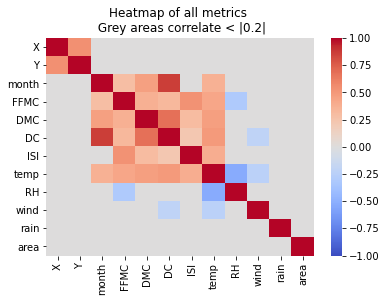

In [207]:
# Set all values below a corrcoeff of 0.2 to 0 for ease of seeing importance
# Set colour palette and min of -1 so grey is 0m red is positive and blue is negative

fcor[np.abs(fcor)<0.2] = 0

sns.heatmap(fcor, cmap = 'coolwarm', vmin = -1)
plt.title("Heatmap of all metrics \n Grey areas correlate < |0.2|")

In [58]:
# We can see that the main correlating areas are month, FFMC, DMC, DC, ISI and temp, so can remove the others

fcors = month_fires[['month','FFMC','DMC','DC','ISI','temp','RH']]

In [221]:
# Check all looks good

fcors.sample(10)

,month,FFMC,DMC,DC,ISI,temp,RH
59,2,86.6,13.2,43.0,5.3,12.3,51
17,10,84.9,32.8,664.2,3.0,16.7,47
345,9,91.5,130.1,807.1,7.5,16.8,43
331,9,91.2,124.4,795.3,8.5,21.5,28
482,8,94.9,130.3,587.1,14.1,23.4,40
53,8,92.1,111.2,654.1,9.6,20.4,42
239,4,81.9,3.0,7.9,3.5,13.4,75
293,7,93.1,180.4,430.8,11.0,26.9,28
186,3,89.3,51.3,102.2,9.6,11.5,39
477,7,93.7,101.3,423.4,14.7,26.1,45


In [116]:
fcors.describe()

,month,FFMC,DMC,DC,ISI,temp,RH
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201
std,2.275990,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469
min,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000
25%,7.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000
50%,8.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000
75%,9.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000
max,12.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000


In [61]:
# Check scatterplots using a function

def scatters(col1,col2):
    scat = plt.scatter(month_fires[col1], month_fires[col2], alpha = 0.5)
    scat = plt.xlabel(col1)
    scat = plt.ylabel(col2)
    scat = plt.title(col1 + " vs " + col2)
    
    plt.show()

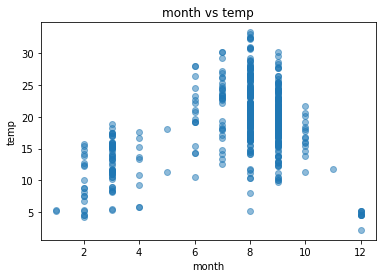

In [118]:
scatters('month', 'temp')

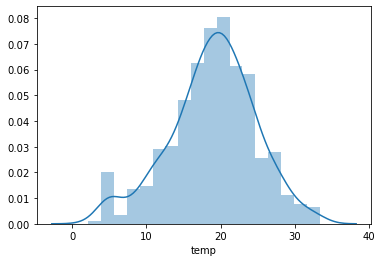

In [64]:
sns.distplot(fires.temp)

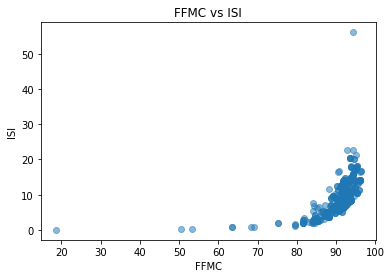

In [14]:
scatters('FFMC', 'ISI')

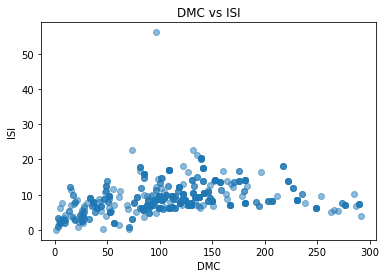

In [15]:
scatters('DMC','ISI')

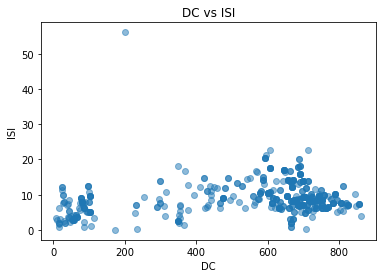

In [16]:
scatters('DC','ISI')

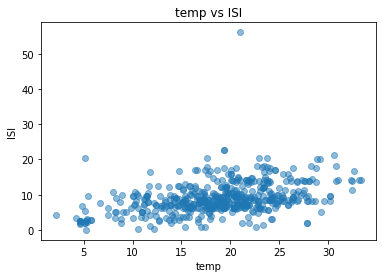

In [17]:
scatters('temp','ISI')

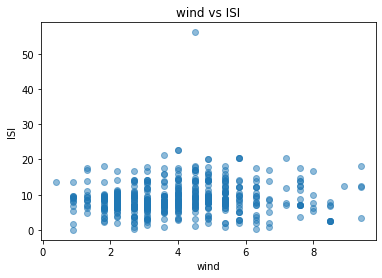

In [18]:
scatters('wind','ISI')

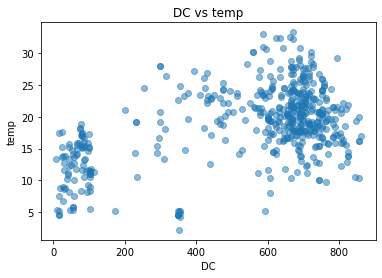

In [19]:
scatters('DC','temp')

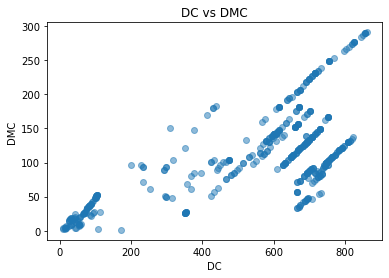

In [20]:
scatters('DC','DMC')

Text(0.5, 1.0, 'Heatmap of Relationships')

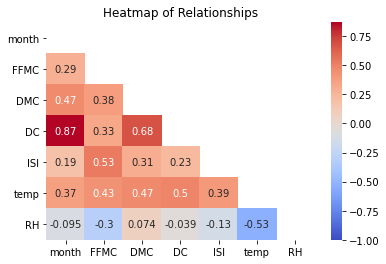

In [209]:
#Making the heatplot easier to read, masking the top half and making positive in red, negative in blue

cor1 = fcors.corr()
mask = np.zeros_like(cor1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor1, mask = mask, cmap = 'coolwarm', vmin = -1, annot = True)
plt.title("Heatmap of Relationships")

## Testing some heatmap ideas

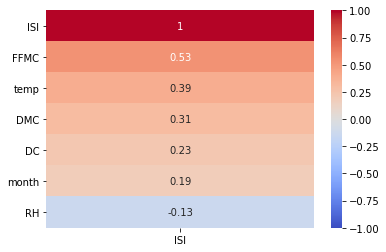

In [109]:
sns.heatmap(cor1[['ISI']].sort_values(by=['ISI'], ascending = False), annot = True, vmin = -1, cmap = 'coolwarm')

In [104]:
def sortedheat(correlation,sortby):
    sns.heatmap(correlation[[sortby]].sort_values(by=[sortby], ascending = False), annot = True, vmin = -1, cmap = 'coolwarm')

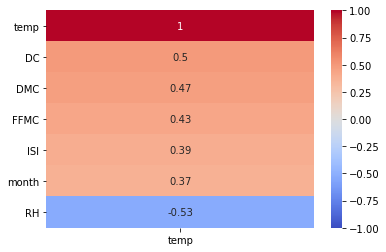

In [105]:
sortedheat(cor1,'temp')

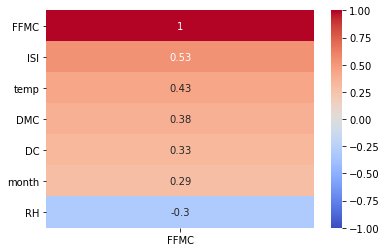

In [106]:
sortedheat(cor1,'FFMC')

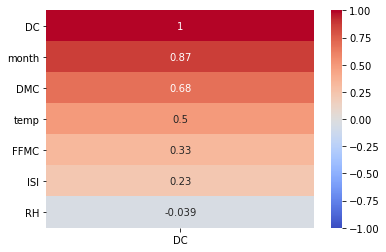

In [107]:
sortedheat(cor1,'DC')

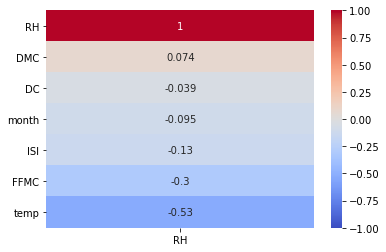

In [108]:
sortedheat(cor1,'RH')

## A global look at the numerical data

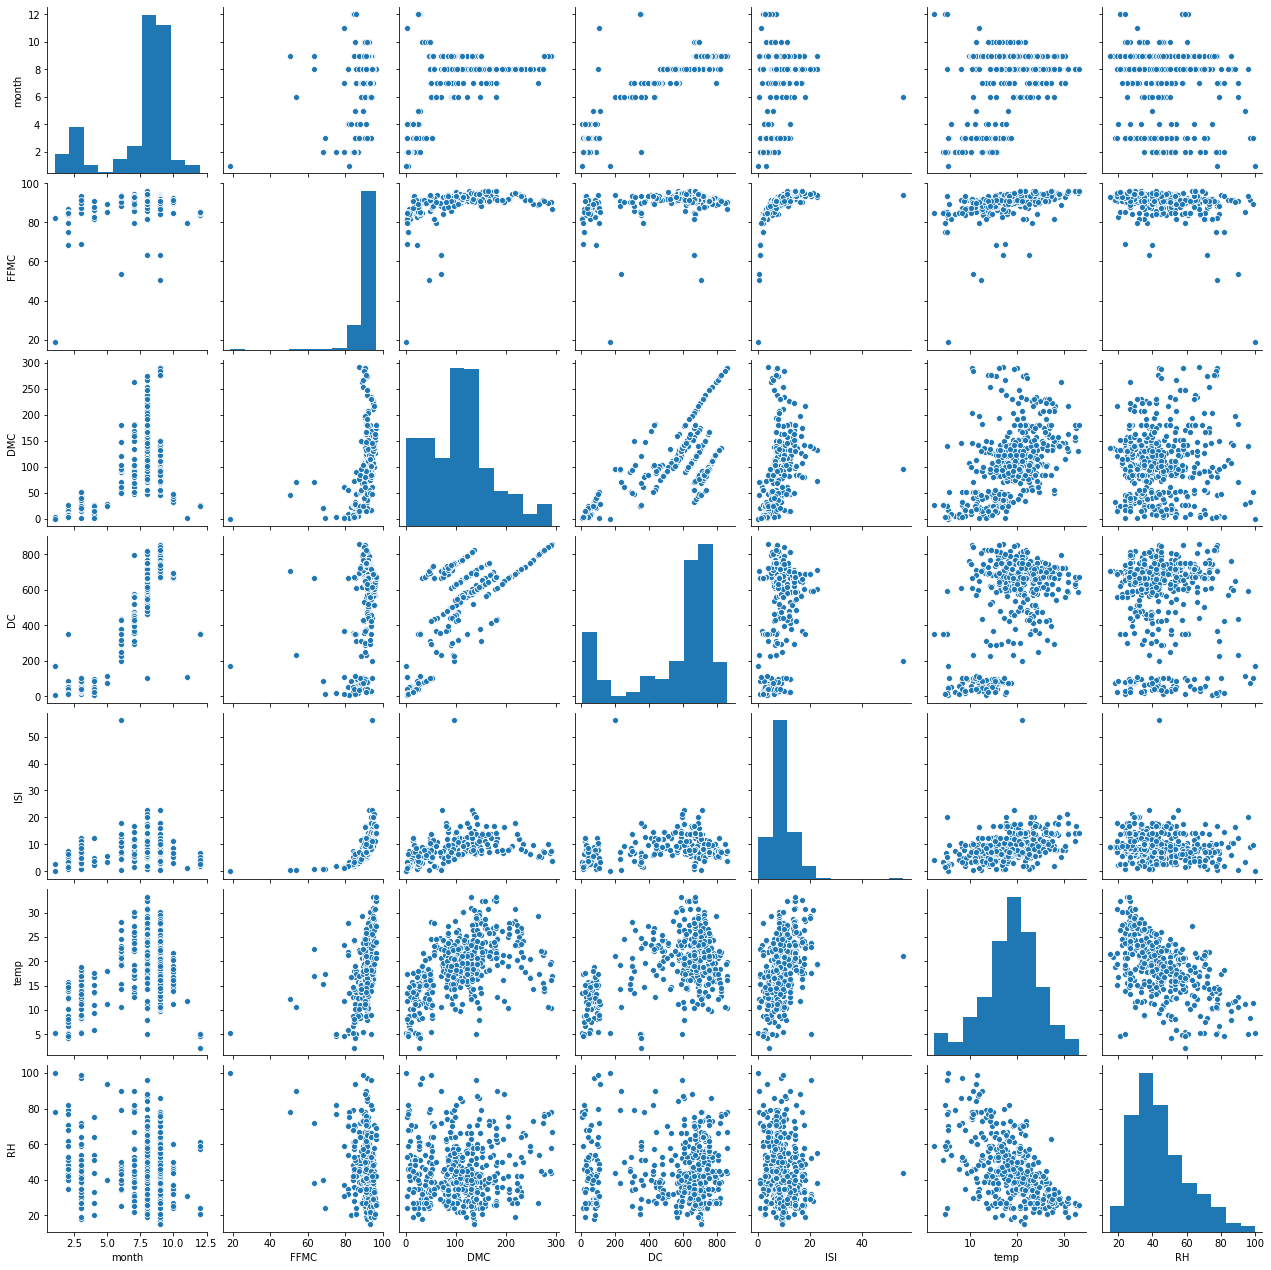

In [72]:
# A much quicker method than defining a function for scatterplots

sns.pairplot(fcors)

In [89]:
# Show how not all months had the same amount of observations taken, use in conclusion, as month is
# still less relevant to the question at hand, but more data is needed.
month_fires.month.value_counts()

8     184
9     172
3      54
7      32
2      20
6      17
10     15
12      9
4       9
5       2
1       2
11      1
Name: month, dtype: int64

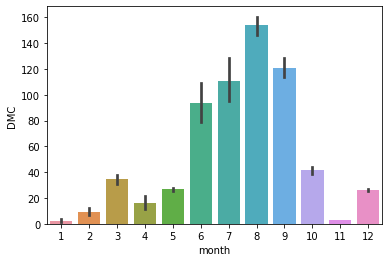

In [211]:
sns.barplot(month_fires.month, month_fires.DMC)

Text(0.5, 0, 'Month')

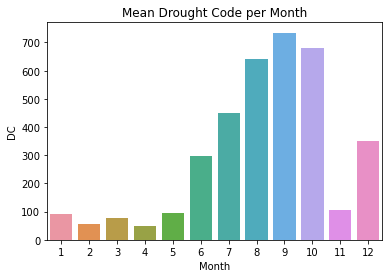

In [216]:
sns.barplot(month_fires.month, month_fires.DC, ci = None)
plt.title('Mean Drought Code per Month')
plt.xlabel('Month')

In [122]:
# So far, looks like relative humidity is a reducing/inverse factor, as it can offset all others the lower it gets. 

In [123]:
reg = LinearRegression()

## Part 1 - FFMC vs ISI: Moisture code vs behavioural index

R-squared score =  0.2828164846822512
[0.43925793] -30.794731103536954


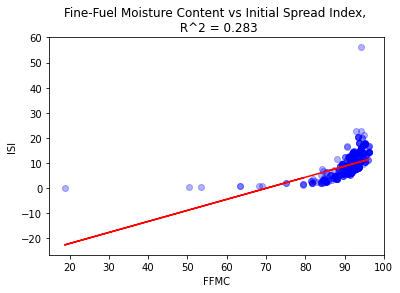

In [201]:
X1 = month_fires['FFMC']
X1r = month_fires['FFMC'].values.reshape(-1,1)
Y1 = month_fires['ISI']

reg.fit(X1r,Y1)

print("R-squared score = ", reg.score(X1r,Y1))

print(reg.coef_, reg.intercept_)

_ = plt.plot(X1r, reg.coef_ * X1r + reg.intercept_, color = 'red')
_ = plt.scatter(X1r, Y1, color = 'blue', alpha = 0.3)
_ = plt.title(f"Fine-Fuel Moisture Content vs Initial Spread Index, \n R^2 = {reg.score(X1r,Y1):.3f}")
_ = plt.xlabel("FFMC")
_ = plt.ylabel("ISI")

In [163]:
# This is not linear, would most likely be logistic regression, haven't learned yet
# However, there is a visible increase the more the FFMC increases


## Part 2 - DC vs DMC: Are moisture codes related?

R-squared score =  0.4653853954603966
[2.642279] 254.9843816771226


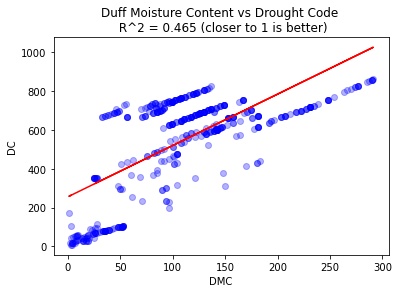

In [220]:
X2 = month_fires['DMC'].values.reshape(-1,1)
Y2 = month_fires['DC']

reg2 = LinearRegression()

reg2.fit(X2,Y2)

print("R-squared score = ", reg2.score(X2,Y2))

print(reg2.coef_, reg2.intercept_)

_ = plt.plot(X2, reg2.coef_ * X2 + reg2.intercept_, color = 'red')
_ = plt.scatter(X2, Y2, color = 'blue', alpha = 0.3)
_ = plt.title(f"Duff Moisture Content vs Drought Code \n R^2 = {reg2.score(X2,Y2):.3f} (closer to 1 is better)")
_ = plt.xlabel("DMC")
_ = plt.ylabel("DC")

In [ ]:
# Definitely a good correlation here

In [203]:
# Try some multivariate, don't do forward feature selection yet

X3 = month_fires[(['DMC', 'temp'])]
Y3 = month_fires['DC']

reg3 = LinearRegression()

reg3.fit(X3,Y3)

print("R-squared score = ", reg3.score(X3,Y3))

print(reg3.coef_, reg3.intercept_)

#Better relationship when more variables are added

R-squared score =  0.5050592059913548
[2.23193914 9.63813025] 118.4234586158168


R-squared score =  0.7546357957997882
[0.00797024] 3.1086073463630877


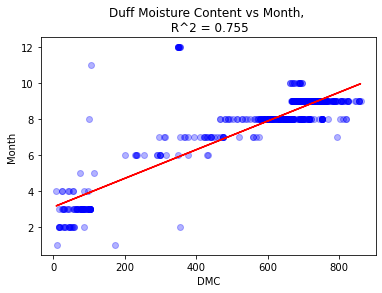

In [205]:
# Test DMC to month, very high R-squared score

X4 = month_fires['DC'].values.reshape(-1,1)
Y4 = month_fires['month']

reg4 = LinearRegression()

reg4.fit(X4,Y4)

print("R-squared score = ", reg4.score(X4,Y4))

print(reg4.coef_, reg4.intercept_)

_ = plt.plot(X4, reg4.coef_ * X4 + reg4.intercept_, color = 'red')
_ = plt.scatter(X4, Y4, color = 'blue', alpha = 0.3)
_ = plt.title(f"Duff Moisture Content vs Month, \n R^2 = {reg4.score(X4,Y4):.3f}")
_ = plt.xlabel("DMC")
_ = plt.ylabel("Month")